In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
filelist = glob.glob("/win/Users/faust/Documents/TCC_MBA/ABM_Project/Results_temp/Apj_N/*.csv")
len(filelist)

36

In [3]:
df = pd.DataFrame()
for file in filelist:
    df_temp = pd.read_csv(file)
    df = pd.concat([df, df_temp])

In [4]:
df.shape

(900000, 30)

In [5]:
df.columns

Index(['agente', 'ag_tamanho', 'ag_investimento', 'ag_max_alpha',
       'ag_atratividade', 'factor', 'agente_alpha_ofertado', 'bid',
       'bid_number', 'estado', 'pop_alvo', 'pop_alvo_ratio', 'pj_tamanho',
       'pj_investimento', 'bid_alpha', 'outorga', 'run', 'reruns',
       'par_bid_alpha', 'par_std_alpha', 'par_atrat_avg', 'par_std_dev',
       'par_number_of_agents', 'par_max_alpha', 'par_atrat_lim',
       'par_distribution', 'par_reatividade', 'par_reruns', 'par_runs',
       'file_name'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Vpj1Spj0.05N0.5Mag0.25L25Vag1.4Sag0.3DgR0T1It1000'}>,
        <AxesSubplot:title={'center':'Vpj1Spj0.05N0.5Mag0.25L30Vag1.4Sag0.3DgR0T1It1000'}>],
       [<AxesSubplot:title={'center':'Vpj1Spj0.05N0.5Mag0.25L35Vag1.4Sag0.3DgR0T1It1000'}>,
        <AxesSubplot:title={'center':'Vpj1Spj0.05N0.5Mag0.25L40Vag1.4Sag0.3DgR0T1It1000'}>],
       [<AxesSubplot:title={'center':'Vpj1Spj0.05N0.5Mag0.25L45Vag1.4Sag0.3DgR0T1It1000'}>,
        <AxesSubplot:title={'center':'Vpj1Spj0.05N0.5Mag0.25L50Vag1.4Sag0.3DgR0T1It1000'}>]],
      dtype=object)

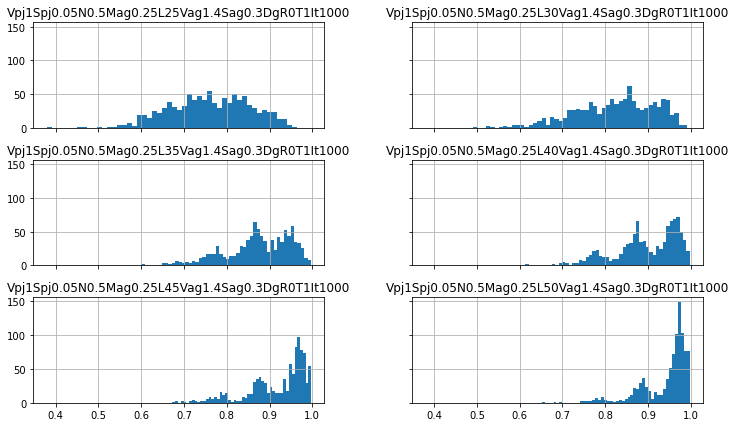

In [25]:
filt_chart = (
    (df['par_bid_alpha'] == 1)
    & (df['agente'] == 'nobid')
)
df_chart = df.loc[filt_chart, :]
df_chart_pivot = 1 - df_chart.pivot_table(index='run', columns='file_name', values='pop_alvo_ratio', aggfunc=np.sum)
df_chart_pivot.hist(figsize=(12,7), bins=50, sharex=True, sharey=True)

In [34]:
df_chart_pivot.columns.tolist()

['Vpj1Spj0.05N0.5Mag0.25L25Vag1.4Sag0.3DgR0T1It1000',
 'Vpj1Spj0.05N0.5Mag0.25L30Vag1.4Sag0.3DgR0T1It1000',
 'Vpj1Spj0.05N0.5Mag0.25L35Vag1.4Sag0.3DgR0T1It1000',
 'Vpj1Spj0.05N0.5Mag0.25L40Vag1.4Sag0.3DgR0T1It1000',
 'Vpj1Spj0.05N0.5Mag0.25L45Vag1.4Sag0.3DgR0T1It1000',
 'Vpj1Spj0.05N0.5Mag0.25L50Vag1.4Sag0.3DgR0T1It1000']

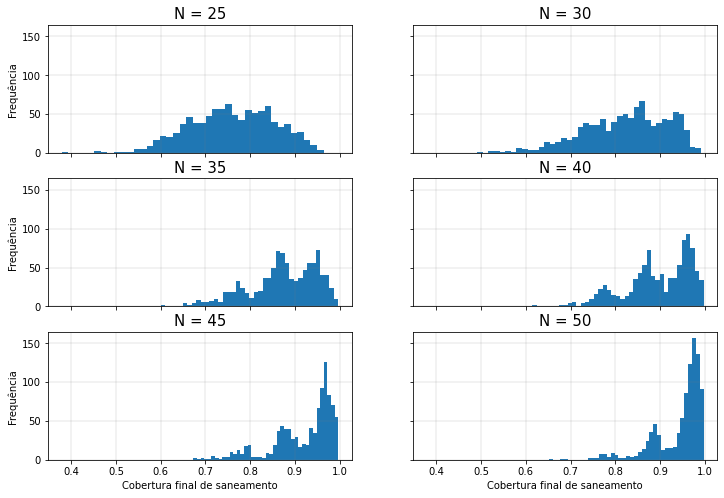

In [64]:
#ho 2235 interval plot for 365D (Draw)
fig, axes = plt.subplots(nrows=3, ncols=2, sharex = True, sharey = True,  figsize = [12, 8])
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

lista = df_chart_pivot.columns.tolist()
bins = 40

ax0.hist(df_chart_pivot[lista[0]], bins=bins)
ax1.hist(df_chart_pivot[lista[1]], bins=bins)
ax2.hist(df_chart_pivot[lista[2]], bins=bins)
ax3.hist(df_chart_pivot[lista[3]], bins=bins)
ax4.hist(df_chart_pivot[lista[4]], bins=bins)
ax5.hist(df_chart_pivot[lista[5]], bins=bins)

ax0.set_title('N = 25', fontsize=15)
ax1.set_title('N = 30', fontsize=15)
ax2.set_title('N = 35', fontsize=15)
ax3.set_title('N = 40', fontsize=15)
ax4.set_title('N = 45', fontsize=15)
ax5.set_title('N = 50', fontsize=15)

ax0.set(ylabel="Frequência")
ax2.set(ylabel="Frequência")
ax4.set(xlabel="Cobertura final de saneamento",ylabel="Frequência")
ax5.set(xlabel="Cobertura final de saneamento")

ax0.grid(color='grey', linestyle='-', linewidth=0.2)
ax1.grid(color='grey', linestyle='-', linewidth=0.2)
ax2.grid(color='grey', linestyle='-', linewidth=0.2)
ax3.grid(color='grey', linestyle='-', linewidth=0.2)
ax4.grid(color='grey', linestyle='-', linewidth=0.2)
ax5.grid(color='grey', linestyle='-', linewidth=0.2)

In [6]:
df['par_bid_alpha'].unique().tolist()

[0.8, 0.9, 1.1, 1.2, 1.3, 1.0]

In [7]:
lista_N = [25, 30, 35, 40, 45, 50]
table_list = []
for n in lista_N:
    filt = (
         (df['agente'] == 'nobid')
        & (df['par_number_of_agents'] == n)
    )

    dfx = df.loc[filt]
    line = dfx.pivot_table(index=['par_number_of_agents', 'run'], values='pop_alvo_ratio',
                          columns='file_name', aggfunc=np.sum).mean().tolist()
    table_list.append(line) 

df_final1 = 1 - pd.DataFrame(table_list, columns=df['par_bid_alpha'].unique().tolist(), index=lista_N)
df_final1.reindex(sorted(df_final1.columns), axis=1).round(2)

,0.8,0.9,1.0,1.1,1.2,1.3
25,0.86,0.82,0.76,0.64,0.46,0.25
30,0.92,0.88,0.82,0.70,0.51,0.30
35,0.94,0.91,0.87,0.75,0.57,0.33
40,0.96,0.94,0.90,0.79,0.61,0.37
45,0.97,0.95,0.92,0.82,0.66,0.40
50,0.98,0.97,0.94,0.86,0.69,0.43


In [8]:
df_pop = df_final1.reset_index().melt(id_vars='index', var_name='Apj',
                                     value_name='coverage').set_index(['index', 'Apj'])

In [9]:
lista_N = [25, 30, 35, 40, 45, 50]
table_list = []
for n in lista_N:
    filt = (
#          (df['agente'] == 'nobid')
        (df['par_number_of_agents'] == n)
    )

    dfx = df.loc[filt]
    line = dfx.pivot_table(index=['par_number_of_agents', 'run'], values='bid',
                          columns='file_name', aggfunc=np.sum).mean().tolist()
    table_list.append(line)

df_final2 = pd.DataFrame(table_list, columns=df['par_bid_alpha'].unique().tolist(), index=lista_N)
df_final2.reindex(sorted(df_final2.columns), axis=1).round(2)

,0.8,0.9,1.0,1.1,1.2,1.3
25,0.91,0.90,0.87,0.76,0.58,0.33
30,0.98,0.98,0.95,0.84,0.64,0.39
35,1.03,1.04,1.02,0.90,0.72,0.43
40,1.07,1.08,1.05,0.96,0.78,0.49
45,1.09,1.11,1.09,1.01,0.83,0.53
50,1.12,1.13,1.13,1.05,0.87,0.57


In [10]:
df_bid = df_final2.reset_index().melt(id_vars='index', var_name='Apj', value_name='bid').set_index(['index', 'Apj'])

In [11]:
lista_N = [25, 30, 35, 40, 45, 50]
table_list = []
for n in lista_N:
    filt = (
#          (df['agente'] == 'nobid')
        (df['par_number_of_agents'] == n)
    )

    dfx = df.loc[filt]
    line = dfx.pivot_table(index=['par_number_of_agents', 'run'], values='bid',
                          columns='file_name', aggfunc='count').mean().tolist()
    table_list.append(line)
    
df_final3 = pd.DataFrame(table_list, columns=df['par_bid_alpha'].unique().tolist(), index=lista_N)
df_final3.reindex(sorted(df_final3.columns), axis=1).round(1)

,0.8,0.9,1.0,1.1,1.2,1.3
25,25.0,25.0,25.0,25.0,25.0,25.0
30,25.0,25.0,25.0,25.0,25.0,25.0
35,25.0,25.0,25.0,25.0,25.0,25.0
40,25.0,25.0,25.0,25.0,25.0,25.0
45,25.0,25.0,25.0,25.0,25.0,25.0
50,25.0,25.0,25.0,25.0,25.0,25.0


In [12]:
df_trys = df_final3.reset_index().melt(id_vars='index', var_name='Apj', 
                                      value_name='trys').set_index(['index', 'Apj'])

In [13]:
df_table = pd.concat([df_pop, df_bid, df_trys], axis=1)
df_table = df_table.reset_index()
df_table.rename(columns = {'index':'N',}, inplace = True)
df_table

,N,Apj,coverage,bid,trys
0,25,0.8,0.862146,0.907152,25.0
1,30,0.8,0.916794,0.983282,25.0
2,35,0.8,0.944211,1.031117,25.0
3,40,0.8,0.960865,1.066566,25.0
4,45,0.8,0.969672,1.091872,25.0
5,50,0.8,0.976433,1.115433,25.0
6,25,0.9,0.816211,0.903447,25.0
7,30,0.9,0.880008,0.983629,25.0
8,35,0.9,0.914742,1.035499,25.0
9,40,0.9,0.938101,1.075584,25.0


In [14]:
df_table.to_excel('/win/Users/faust/Documents/TCC_MBA/ABM_Project/Results_temp/Apj_N/Apj_N_001.xlsx', index=False)